In the last project, you performed k-means clustering on the Enron characters using their financial data as inputs. We’ll update that work to include scaled features, to see how that changes things.

#### What kind of Scaling

Look back to the last part of the K-Means Clustering Mini-Project. We deployed scaling there without going into the details of the scaling algorithm, but now you know much more about specific scaling algorithms and can diagnose what kind of scaling we were using.

What type of scaling was deployed?

--> MinMaxScaler

#### Computing Rescaled Features

Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). What would be the rescaled value of a "salary" feature that had an original value of $ 200000 and an "exercised_stock_options" feature of $1 million? (Be sure to represent these numbers as floats, not integers!)


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def featureFormat(dictionary, features, remove_NaN=True,
                  remove_all_zeroes=False, remove_any_zeroes=False, sort_keys=False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """
    return_list = []
    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print "error: key ", feature, " not present"
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [3]:
def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

In [4]:
def Draw(pred, features, poi, mark_poi=False, name="image.png",
         f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters"""
    ### plot each cluster with a different color-- add more colors for
    ### drawing more than five clusters
    colors= ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])
    ### if you like, place red stars over points that are POIs
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [5]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [6]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [7]:
type(finance_features)

list

In [8]:
finance_features

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([       0.,  5210569.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 288589.,       0.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([ 0.,  0.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 0.,  0.]),
 array([ 187922.,       0.]),
 array([ 0.,  0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 0.,  0.]),
 a

In [9]:
type(poi)

list

In [10]:
poi

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
rescaled_features = scaler.fit_transform(np.array(finance_features))

In [14]:
rescaled_features

array([[  3.29165684e-01,   0.00000000e+00],
       [  2.40360024e-01,   1.94493691e-01],
       [  1.53826564e-01,   1.42374791e-01],
       [  0.00000000e+00,   1.89776031e-02],
       [  2.18934757e-01,   1.61230322e-01],
       [  2.40351925e-01,   0.00000000e+00],
       [  0.00000000e+00,   1.43671679e-02],
       [  3.33359130e-01,   3.21428222e-02],
       [  0.00000000e+00,   1.51697646e-01],
       [  1.77358453e-01,   2.56282799e-02],
       [  1.17636049e-01,   6.64592547e-02],
       [  2.59695768e-01,   0.00000000e+00],
       [  2.23661832e-01,   2.22809026e-02],
       [  2.31706768e-01,   0.00000000e+00],
       [  0.00000000e+00,   6.45816409e-02],
       [  0.00000000e+00,   1.08361721e-02],
       [  2.59653474e-01,   0.00000000e+00],
       [  2.26458662e-01,   3.07531207e-02],
       [  2.59667872e-01,   5.38782261e-03],
       [  5.73620167e-02,   0.00000000e+00],
       [  0.00000000e+00,   2.99964330e-02],
       [  3.21339419e-01,   1.26542896e-01],
       [  

In [15]:
rescaled_datapoint = scaler.transform(np.array([2.0e+5, 1.0e+6]))

/Users/alonavarshal/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [16]:
rescaled_datapoint

array([ 0.17997621,  0.02911345])

Found another way:

In [42]:
finance_features.append(np.array(np.array([200000.0, 1000000.0])))

In [45]:
finance_features

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([       0.,  5210569.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 288589.,       0.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([ 0.,  0.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 0.,  0.]),
 array([ 187922.,       0.]),
 array([ 0.,  0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 0.,  0.]),
 a

Data point can be found at the bottom of the list above.

Rescale the appended list:

In [43]:
rescaled_finance_features = scaler.fit_transform(finance_features)

In [44]:
rescaled_finance_features

array([[  3.29165684e-01,   0.00000000e+00],
       [  2.40360024e-01,   1.94493691e-01],
       [  1.53826564e-01,   1.42374791e-01],
       [  0.00000000e+00,   1.89776031e-02],
       [  2.18934757e-01,   1.61230322e-01],
       [  2.40351925e-01,   0.00000000e+00],
       [  0.00000000e+00,   1.43671679e-02],
       [  3.33359130e-01,   3.21428222e-02],
       [  0.00000000e+00,   1.51697646e-01],
       [  1.77358453e-01,   2.56282799e-02],
       [  1.17636049e-01,   6.64592547e-02],
       [  2.59695768e-01,   0.00000000e+00],
       [  2.23661832e-01,   2.22809026e-02],
       [  2.31706768e-01,   0.00000000e+00],
       [  0.00000000e+00,   6.45816409e-02],
       [  0.00000000e+00,   1.08361721e-02],
       [  2.59653474e-01,   0.00000000e+00],
       [  2.26458662e-01,   3.07531207e-02],
       [  2.59667872e-01,   5.38782261e-03],
       [  5.73620167e-02,   0.00000000e+00],
       [  0.00000000e+00,   2.99964330e-02],
       [  3.21339419e-01,   1.26542896e-01],
       [  

Answer is the values at the bottom of rescaled_finance_features array.

#### When to Deploy Feature Scaling

One could argue about whether rescaling the financial data is strictly necessary, perhaps we want to keep the information that a $100,000 salary and $40,000,000 in stock options are dramatically different quantities. What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? Would feature scaling be unnecessary in this case, or critical?

- critical

#### Extra: k-means clustering using the rescaled_features

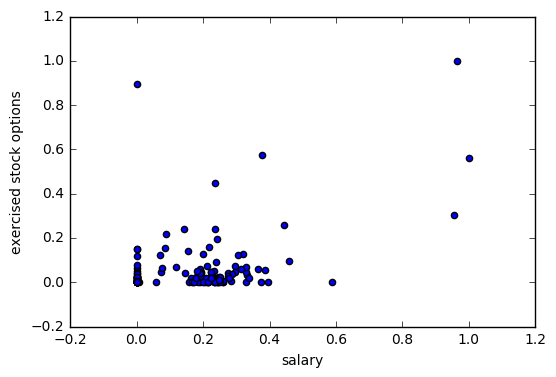

In [19]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in rescaled_features:
    plt.scatter( f1, f2 )
plt.xlabel('salary')
plt.ylabel('exercised stock options')
plt.show()

Cluster here. Create predictions of the cluster labels for the data and store them to a list called pred.

Example code can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [20]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(rescaled_features)

In [25]:
pred = kmeans.predict(rescaled_features)

Rename the "name" parameter when you change the number of features so that the figure gets save to a different file:

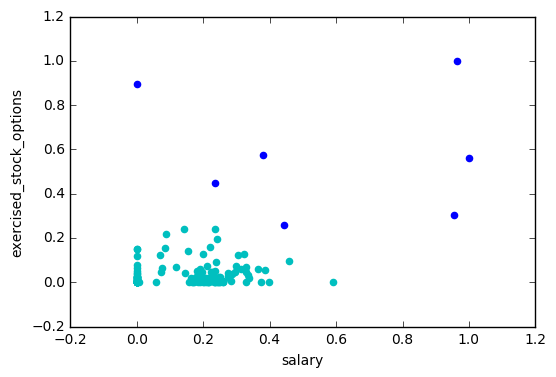

In [26]:
try:
    Draw(pred, rescaled_features, poi, mark_poi=False, name="clusters121016.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


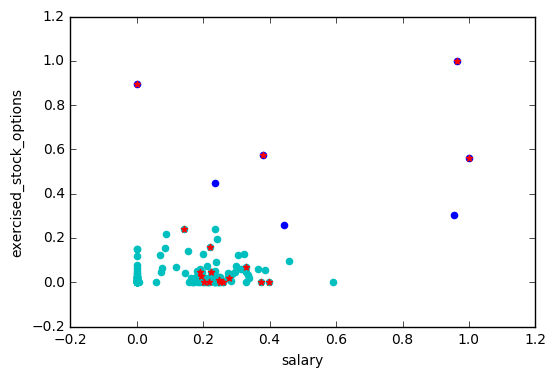

In [27]:
try:
    Draw(pred, rescaled_features, poi, mark_poi=True, name="clusters121016b.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


<- compare with previous un-scaled features